# Xây dựng mô hình Naïve ngây thơ trên tập dữ liệu hành vi của khách hàng

###### https://www.kaggle.com/code/arezalo/customer-behaviour-prediction-naive-bayes

#### Bước 1: Import thư viện, nạp dữ liệu vào notebook và đọc dữ liệu

In [48]:
# Import thư viện và nạp dữ liệu vào note book
# Xử lý dữ liệu
import pandas as pd
import numpy as np

# Trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

# Tiền xử lý dữ liệu
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Mô hình Naïve Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB
# Đánh giá mô hình
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Thống kê mô tả (tùy chọn)
import scipy.stats as stats

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False

In [67]:
data = pd.read_csv("customer_behaviour.csv")

print("Kích thước dữ liệu:", data.shape)
display(data.head())

Kích thước dữ liệu: (400, 5)


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [50]:
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# Kiểm tra kích thước và thông tin dữ liệu
print(data.shape)
print(data.info())

# Xem 10 dòng đầu
data.head(10)

(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0
5  15728773    Male   27            58000          0
6  15598044  Female   27            84000          0
7  15694829  Female   32           150000          1
8  15600575    Male   25            33000          0
9  15727311  Female   35            65000          0

#### Bước 2: Xử lý dữ liệu trước khi xây dựng mô hình từ dữ liệu

In [68]:
# Kiểm tra các lỗi trung lặp và điều chỉnh (nếu có)
duplicates = data.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicates}")

Số dòng bị trùng lặp: 0


In [69]:
# Kiểm tra kiểu dữ liệu, lỗi định dạng
print("\nKiểm tra các kiểu dữ liệu:")
print(data.dtypes)


Kiểm tra các kiểu dữ liệu:
User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object


In [70]:
# Kiểm tra và xử lí giá trị bị thiếu (Missing Value)
print("Số lượng giá trị thiếu trong từng cột:")

# print(data.isnull().sum()) -- Lệnh này vẫn dùng được
df.isnull().sum().to_frame('NaN value').T

Số lượng giá trị thiếu trong từng cột:


User ID  Gender  Age  EstimatedSalary  Purchased
NaN value        0       0    0                0          0

In [55]:
# Kiểm tra giá trị duy nhất ở mỗi cột
for col in df:
    print(f"{col}: {df[col].nunique()}")

User ID: 400
Gender: 2
Age: 43
EstimatedSalary: 117
Purchased: 2


In [56]:
df.describe(include=[object]).T

count unique     top freq
Gender   400      2  Female  204

###### Theo các bảng trên:
###### - Phạm vi tuổi là từ 16 đến 60 tuổi.
###### - Mục tiêu bao gồm 2 lớp 1 và 0.
###### - Số lượng nam và nữ trong tập dữ liệu gần như bằng nhau.
###### - Phạm vi của các đặc trưng rất khác nhau và cần có sự chuẩn hóa.

#### Bước 3: Thống kê mô tả bằng NumPy, Pandas

In [57]:
# Loại bỏ cột 'User ID' vì không mang thông tin hành vi
data = data.drop('User ID', axis=1)

In [58]:
# Mã hóa cột 'Gender'
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [59]:
# Tách biến độc lập (X) và biến phụ thuộc (y)
X = data[['Gender', 'Age', 'EstimatedSalary']]
y = data['Purchased']

In [61]:
# Sử dụng Pandas
print("Thống kê mô tả (Pandas):")
display(df.describe())

Thống kê mô tả (Pandas):


User ID      Age  EstimatedSalary  Purchased
count  4.000e+02  400.000           400.00    400.000
mean   1.569e+07   37.655         69742.50      0.357
std    7.166e+04   10.483         34096.96      0.480
min    1.557e+07   18.000         15000.00      0.000
25%    1.563e+07   29.750         43000.00      0.000
50%    1.569e+07   37.000         70000.00      0.000
75%    1.575e+07   46.000         88000.00      1.000
max    1.582e+07   60.000        150000.00      1.000

In [71]:
# Sử dụng NumPy
print("Thống kê mô tả (NumPy)")
# Chỉ chọn cột số (int hoặc float)
numeric_df = df.select_dtypes(include=[np.number])

# Tính trung bình từng cột
print("\nGiá trị trung bình từng biến (NumPy):")
print(np.mean(numeric_df, axis=0))

Thống kê mô tả (NumPy)

Giá trị trung bình từng biến (NumPy):
User ID            1.569e+07
Age                3.766e+01
EstimatedSalary    6.974e+04
Purchased          3.575e-01
dtype: float64


In [66]:
# Sử dụng SciPy - Kiểm định phân phối chuẩn cho 1 biến ví dụ
print("\nKiểm định (SciPy)")
col_test = 'Age'  # 👈 Thay cột này cho phù hợp với dữ liệu của bạn

# Thực hiện kiểm định phân phối chuẩn
stat, p = stats.normaltest(df[col_test])
print(f"\nKiểm định phân phối chuẩn cho '{col_test}': stat={stat:.3f}, p-value={p:.3f}")

if p > 0.05:
    print("Không bác bỏ H0 → Dữ liệu có thể tuân theo phân phối chuẩn.")
else:
    print("Bác bỏ H0 → Dữ liệu không tuân theo phân phối chuẩn.")


Kiểm định (SciPy)

Kiểm định phân phối chuẩn cho 'Age': stat=17.093, p-value=0.000
Bác bỏ H0 → Dữ liệu không tuân theo phân phối chuẩn.


#### Bước 4: Xây dựng mô hình Naïve Bayes

In [73]:
# Chia dữ liệu để train và test (80% train và 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Tập train:", X_train.shape)
print("Tập test:", X_test.shape)

Tập train: (320, 3)
Tập test: (80, 3)


In [39]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

#### Bước 5: Đánh giá hiệu quả của mô hình

In [40]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

print("Độ chính xác:", accuracy_score(y_test, y_pred))
print("\nMa trận nhầm lẫn:\n", confusion_matrix(y_test, y_pred))
print("\nBáo cáo phân loại:\n", classification_report(y_test, y_pred))

Độ chính xác: 0.875

Ma trận nhầm lẫn:
 [[47  4]
 [ 6 23]]

Báo cáo phân loại:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        51
           1       0.85      0.79      0.82        29

    accuracy                           0.88        80
   macro avg       0.87      0.86      0.86        80
weighted avg       0.87      0.88      0.87        80



#### Bước 6: Trực quan hóa

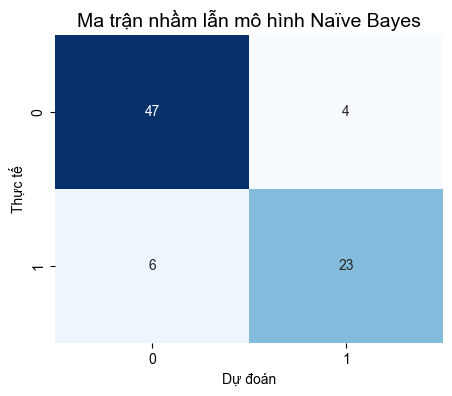

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Giả sử bạn đã có y_test và y_pred
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Ma trận nhầm lẫn mô hình Naïve Bayes", fontsize=14)
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()


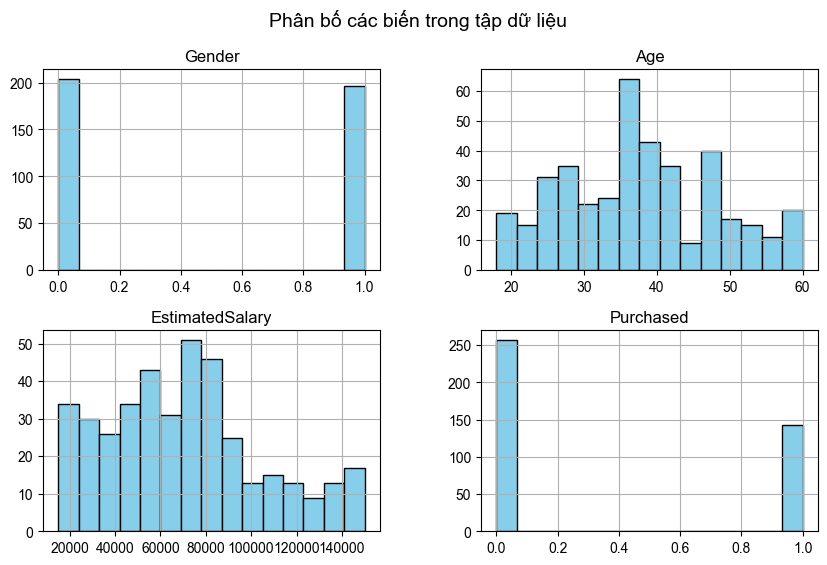

In [42]:
# Trực quan hóa phân bố từng biến
data.hist(figsize=(10,6), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Phân bố các biến trong tập dữ liệu", fontsize=14)
plt.show()

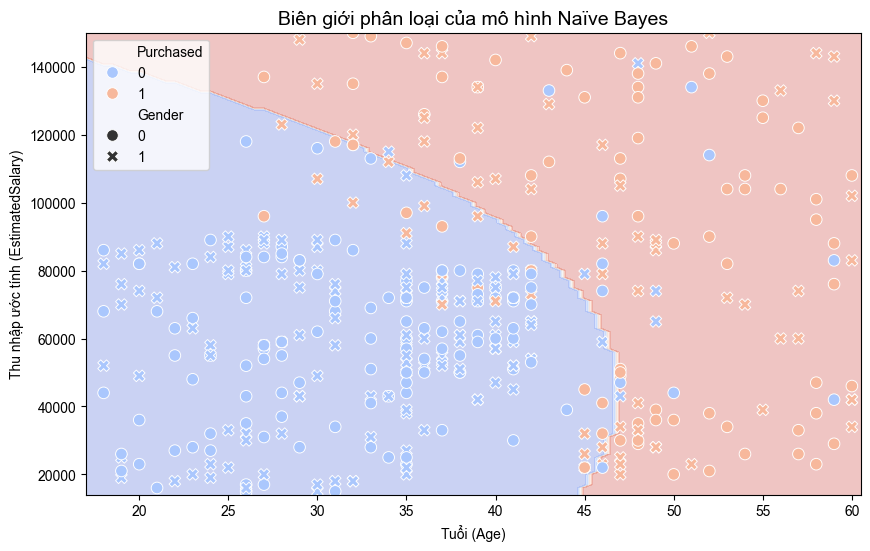

In [43]:
import numpy as np

# Lấy giá trị nhỏ nhất và lớn nhất của 2 biến
x_min, x_max = X_train['Age'].min() - 1, X_train['Age'].max() + 1
y_min, y_max = X_train['EstimatedSalary'].min() - 1000, X_train['EstimatedSalary'].max() + 1000

# Tạo lưới điểm
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 1000))

# Tạo DataFrame để dự đoán
Z = model.predict(pd.DataFrame({
    'Gender': [1]*len(xx.ravel()),  # giả sử Gender=1 (Nam)
    'Age': xx.ravel(),
    'EstimatedSalary': yy.ravel()
}))
Z = Z.reshape(xx.shape)

# Vẽ vùng phân loại
plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(
    data=data, 
    x='Age', 
    y='EstimatedSalary', 
    hue='Purchased', 
    style='Gender', 
    palette='coolwarm', 
    s=70
)
plt.title("Biên giới phân loại của mô hình Naïve Bayes", fontsize=14)
plt.xlabel("Tuổi (Age)")
plt.ylabel("Thu nhập ước tính (EstimatedSalary)")
plt.show()


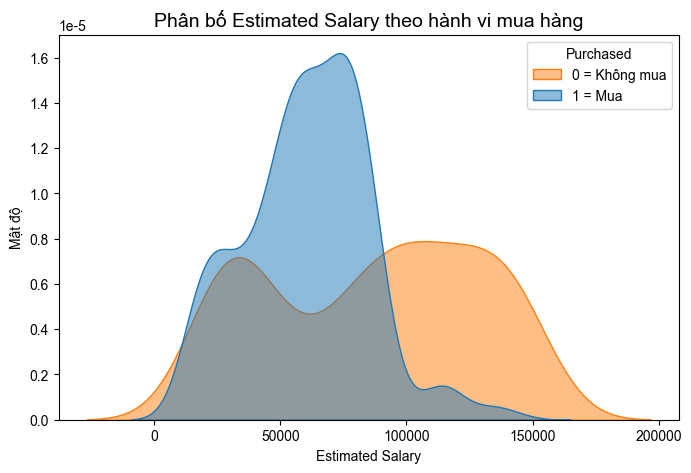

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.kdeplot(data=data, x='EstimatedSalary', hue='Purchased', fill=True, common_norm=False, alpha=0.5)
plt.title("Phân bố Estimated Salary theo hành vi mua hàng", fontsize=14)
plt.xlabel("Estimated Salary")
plt.ylabel("Mật độ")
plt.legend(title='Purchased', labels=['0 = Không mua', '1 = Mua'])
plt.show()


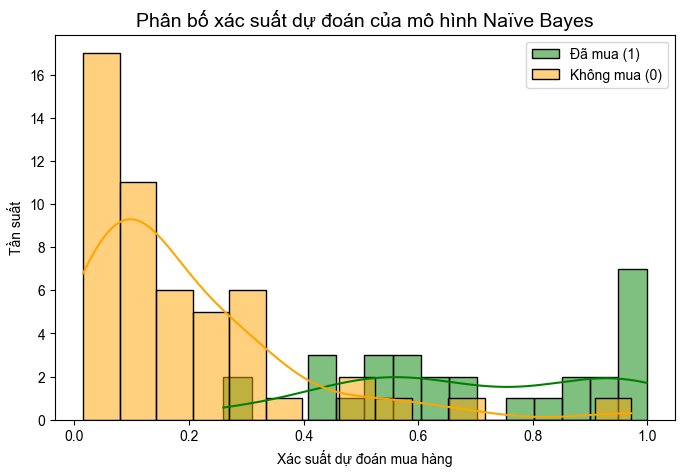

In [45]:
y_proba = model.predict_proba(X_test)[:, 1]  # Xác suất "mua hàng"

plt.figure(figsize=(8,5))
sns.histplot(y_proba[y_test==1], bins=15, color='green', label='Đã mua (1)', kde=True)
sns.histplot(y_proba[y_test==0], bins=15, color='orange', label='Không mua (0)', kde=True)
plt.title("Phân bố xác suất dự đoán của mô hình Naïve Bayes", fontsize=14)
plt.xlabel("Xác suất dự đoán mua hàng")
plt.ylabel("Tần suất")
plt.legend()
plt.show()


#### Bước 6: Kết luận

Kết quả mô hình Naïve Bayes cho thấy độ chính xác đạt 87,5%, phản ánh khả năng dự đoán khá tốt hành vi mua hàng của khách hàng dựa trên các đặc điểm nhân khẩu học như giới tính, độ tuổi và thu nhập ước tính. Ma trận nhầm lẫn cho thấy mô hình nhận diện đúng 92% khách hàng không mua và 79% khách hàng có hành vi mua hàng, cho thấy hiệu quả cao trong việc phân loại hai nhóm đối tượng. Tuy nhiên, mô hình vẫn có xu hướng bỏ sót một số khách hàng tiềm năng (nhóm mua hàng), do đó trong các nghiên cứu hoặc ứng dụng thực tế có thể cân nhắc kết hợp thêm các biến hành vi hoặc đặc điểm tâm lý để nâng cao hiệu suất dự đoán.